# Trabajo práctico integrador 
## _Aprendizaje de Maquina_
### CEIA Co12

### Alumnos:
- Córdoba, Pablo
- Pérez Millán, Rodrigo

### Dataset:
- [Wine Quality](https://www.kaggle.com/datasets/joebeachcapital/wine-quality)

### Posibles cuestiones a resolver:

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol


Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [2]:
DATASET_PATH = "./dataset"

In [3]:
#Leo las columnas
cols = pd.read_csv(DATASET_PATH + '/winequality.columns.csv').column.values.tolist()

print("Columnas: ", cols)

#Leo csv de vino rojo
data_red = pd.read_csv(DATASET_PATH + '/winequality-red.csv',
                       delimiter=';',
                       header=0,
                       names = cols
                    )

#Adjunto una columna nueva con el tipo
data_red["type"]="red"

#Leo csv de vino blanco
data_white = pd.read_csv(DATASET_PATH + '/winequality-white.csv',
                       delimiter=';',
                       header=0,
                       names = cols
                    )
#Adjunto una columna nueva con el tipo
data_white["type"]="white"

#Defino el df final de trabajo
wine=pd.concat([data_white,data_red],ignore_index=True)

wine.head(-10)

Columnas:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6482            6.7              0.32         0.44             2.4      0.061   
6483            7.2              0.39         0.44             2.6      0.066   
6484            7.5              0.31         0.41             2.4      0.065   
6485            5.8              0.61         0.11             1.8      0.066   
6486            7.2              0.66         0.33             2.5      0.068   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
6482                 24.0                  34.0  0.99484  3.29       0.80   
6483                 22.0                  48.0  0.99494  3.30       0.84   
6484                 34.0                  60.0  0.99492  3.34       0.85   
6485                 18.0                  28.0  0.99483  3.55       0.66   
6486                 34.0                 102.0  0.99414  3.27       0.78   

      alcohol  quality   type  
0         8.8        6  white  
1         9.5        6  white  
2        10.1        6  white  
3         9.9        6  white  
4         9.9        6  white  
...       ...      ...    ...  
6482     11.6        7    red  
6483     11.5        6    red  
6484     11.4        6    red  
6485     10.9        6    red  
6486     12.8        6    red  

[6487 rows x 13 columns]

# Análisis exploratorio básico y preprocesamiento de los datos


In [4]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [5]:
numerical_features = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol" ]
categorical_features = ["type"]
target = "quality"

Una vez separadas las variables por tipo. Lo primero es binarizar a la variable target (Quality)

In [6]:
wine[target].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

### Histograma de la variable de salida 

Vemos un pequeño histograma para ver como está distribuida la salida

<Axes: >

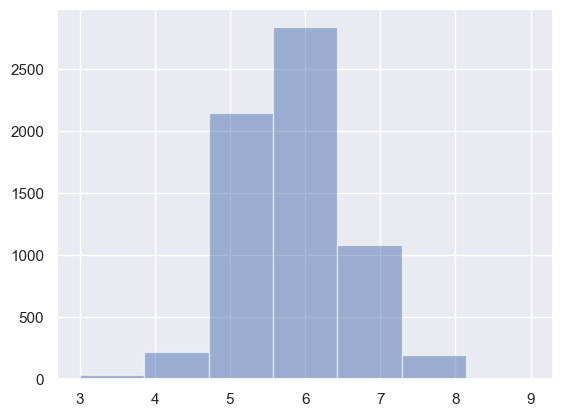

In [7]:
wine.quality.hist(bins=7,alpha=0.5)

### Analizo las variables categoricas   

In [8]:
pd.get_dummies(wine[categorical_features])

type_red  type_white
0        False        True
1        False        True
2        False        True
3        False        True
4        False        True
...        ...         ...
6492      True       False
6493      True       False
6494      True       False
6495      True       False
6496      True       False

[6497 rows x 2 columns]

Aca no hay mucho que hacer, dado a que son completementarias

PCA??

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9).fit(wine[numerical_features])

pca.n_components_

1

In [10]:
X_transformed = pca.transform(wine[numerical_features]) 

In [11]:
X_transformed

array([[ 56.71842647],
       [ 11.84877383],
       [-18.2884433 ],
       ...,
       [-74.11342856],
       [-69.53853199],
       [-74.64835951]])

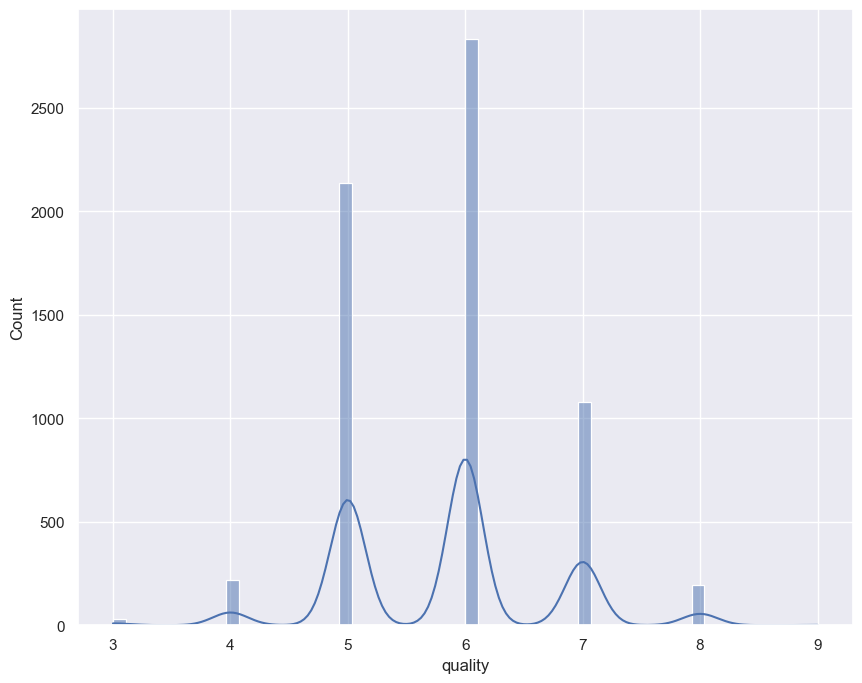

In [12]:
# Vemos las distribuciones de la variable de salida con KDE

fig, axes = plt.subplots(figsize=(10,8))
sns.histplot(x= wine.quality, kde= True, log_scale= False, ax=axes) 
plt.show()

### Boxplot

Hacmeos un boxplot de las variables

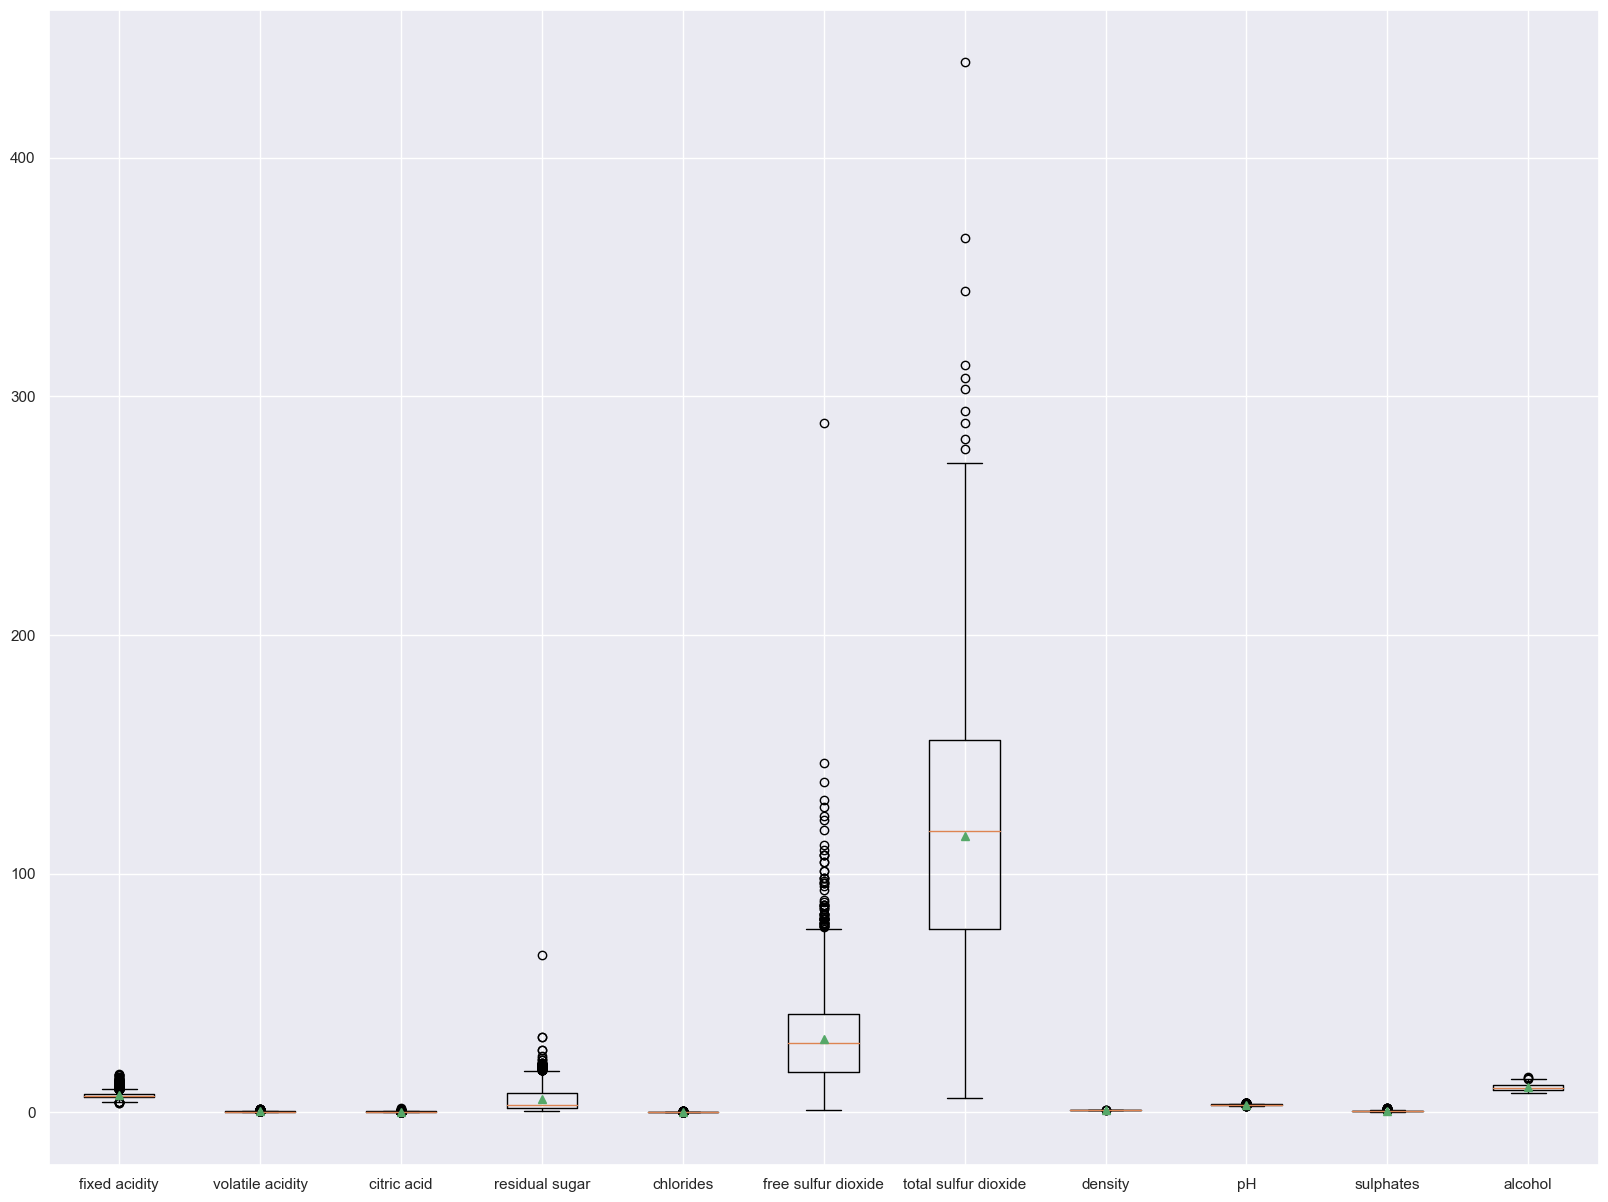

In [13]:
fig,axes = plt.subplots(1,figsize=(20,15))
axes.boxplot(wine[numerical_features],labels=numerical_features,showmeans=True)
plt.show()
# axes.set_xlabel("Valor de $\lambda$")
# axes.set_ylabel("MSE")
# axes.set_title("Efecto de distintos valores de $\lambda$ en regresión lineal simple");

### Correlación de variables 

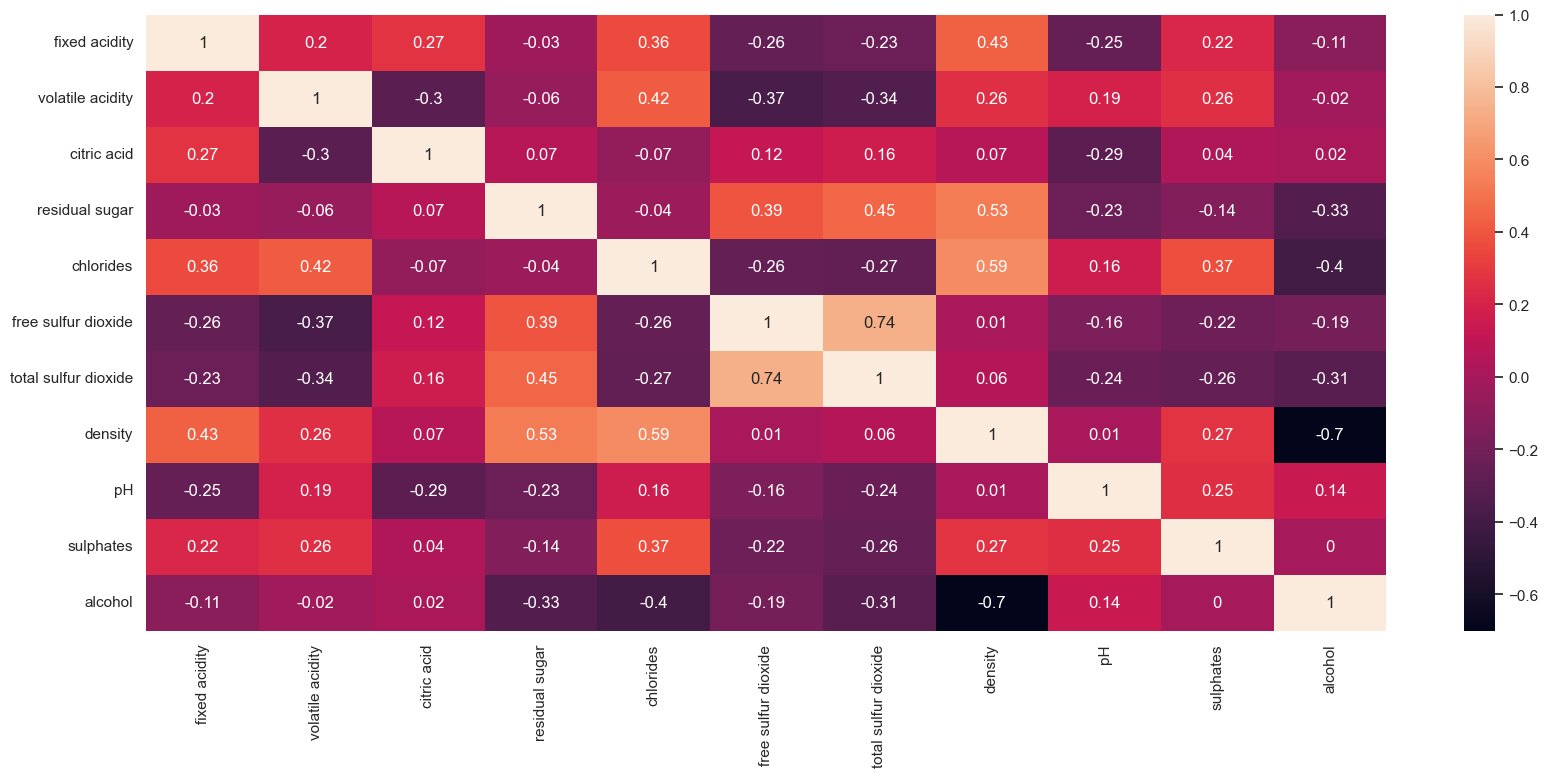

In [14]:
# Matriz de correlación, redondeo a 2 decimales
correlation_matrix = wine[numerical_features].corr(method = 'spearman').round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes);

Seguimos viendo las correlaciones entre variables

<Axes: xlabel='alcohol', ylabel='density'>

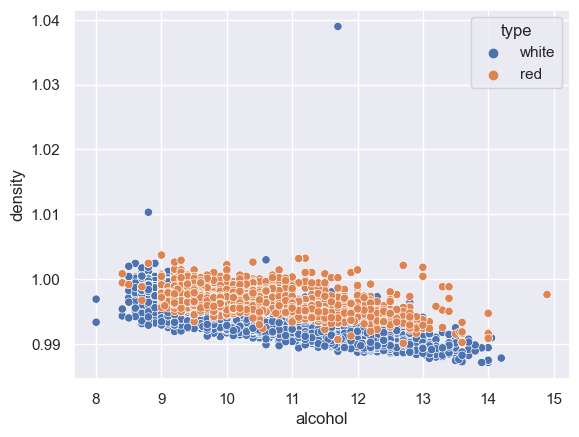

In [15]:
sns.scatterplot(data=wine,x="alcohol",y="density",hue="type")

Podemos ver algunos outliers

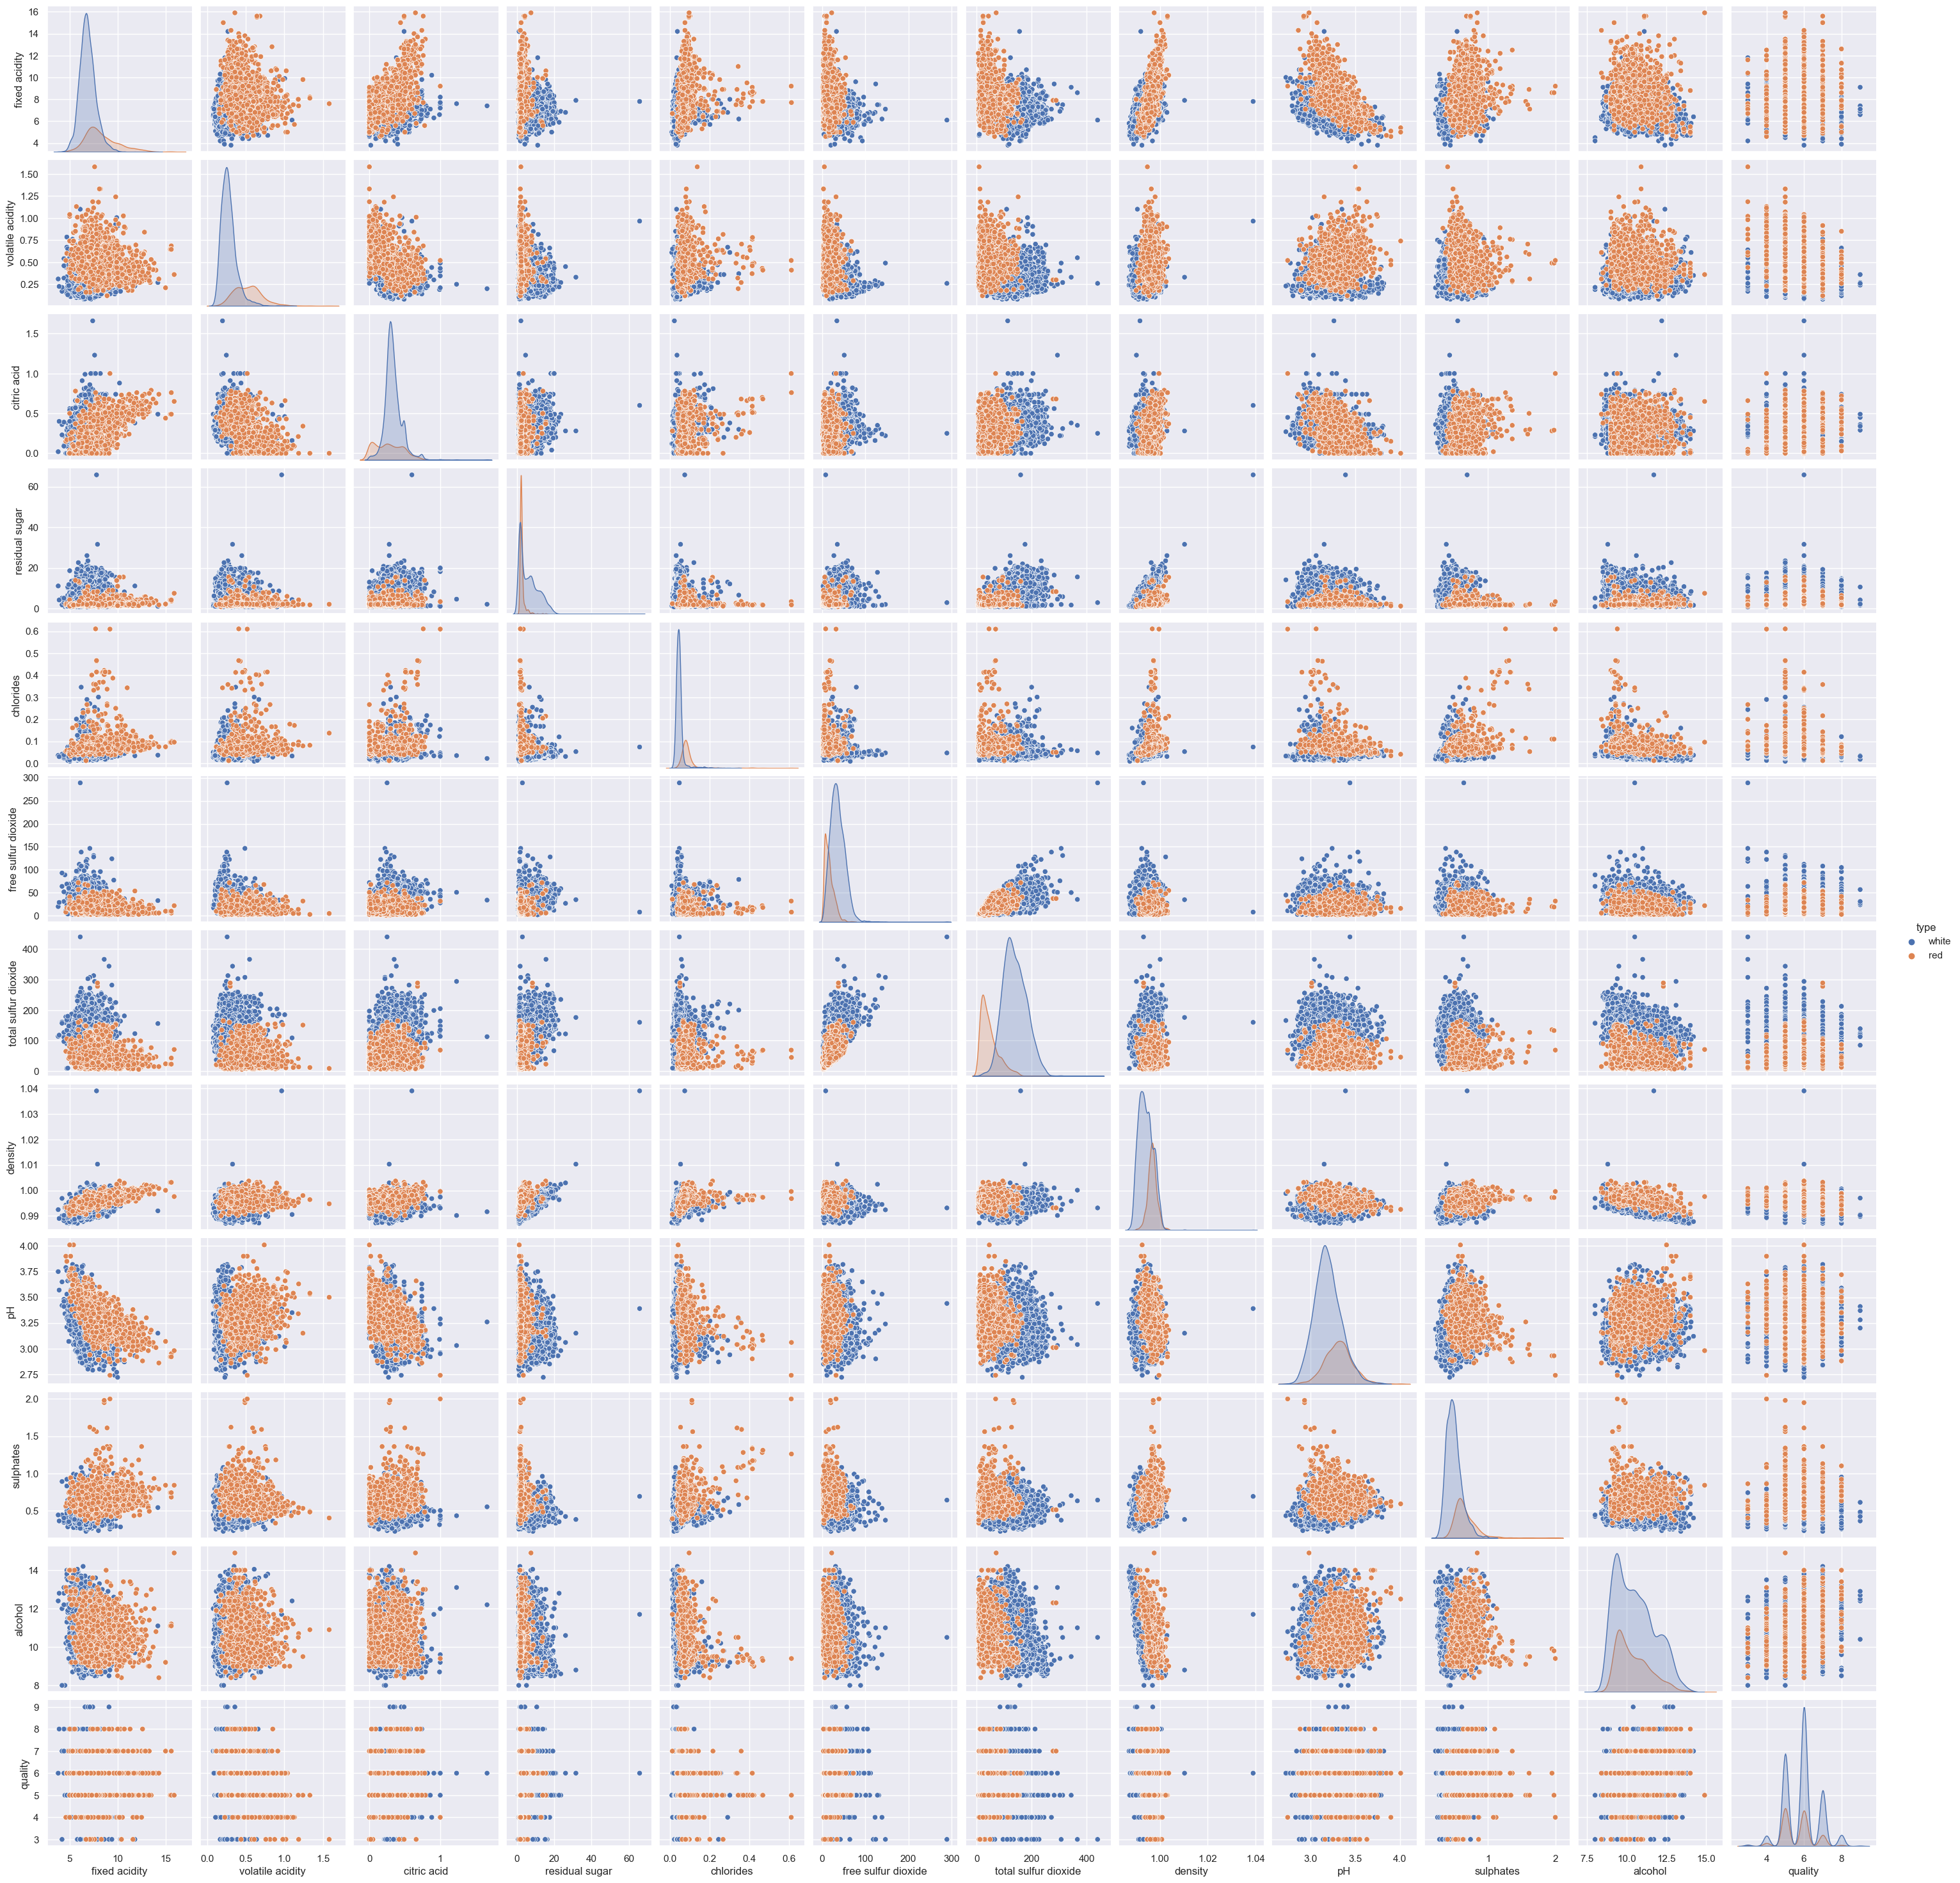

In [29]:
sns.pairplot(wine, hue="type")


Missing values - TO DO

Discretizacion - TO DO

### Modelo de Regressión 

TO DO